In [27]:
#Import important libaries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
warnings.simplefilter('always')
warnings.simplefilter('ignore')

# Data Inspection

In [2]:
df= pd.read_csv("C:\\Users\\khush\\OneDrive\\Documents\\Data Science\\test.csv")

In [3]:
df.shape

(42514, 25)

In [4]:
df.head()

,S.No,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,...,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,notify,problem_ID,change_request
0,1,INC0000045,Resolved,True,0,0,2,Caller 2403,Opened by 8,29-02-2016 01:16,...,Location 143,Category 55,Symptom 72,Group 56,?,True,False,Do Not Notify,?,?
1,2,INC0000047,New,True,0,0,0,Caller 2403,Opened by 397,29-02-2016 04:40,...,Location 165,Category 40,Symptom 471,Group 70,Resolver 89,True,False,Do Not Notify,?,?
2,3,INC0000047,Active,True,1,0,3,Caller 2403,Opened by 397,29-02-2016 04:40,...,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,Do Not Notify,?,?
3,4,INC0000047,Resolved,True,1,0,7,Caller 2403,Opened by 397,29-02-2016 04:40,...,Location 165,Category 40,Symptom 471,Group 24,Resolver 89,True,False,Do Not Notify,?,?
4,5,INC0000057,New,True,0,0,4,Caller 4416,Opened by 8,29-02-2016 06:10,...,Location 204,Category 20,Symptom 471,Group 70,?,True,False,Do Not Notify,Problem ID 2,?


In [5]:
df.columns

Index(['S.No', 'ID', 'ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated', 'ID_caller', 'opened_by', 'opened_time', 'Created_by',
       'created_at', 'updated_by', 'updated_at', 'type_contact', 'location',
       'category_ID', 'user_symptom', 'Support_group', 'support_incharge',
       'Doc_knowledge', 'confirmation_check', 'notify', 'problem_ID',
       'change_request'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42514 entries, 0 to 42513
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   S.No                42514 non-null  int64 
 1   ID                  42514 non-null  object
 2   ID_status           42514 non-null  object
 3   active              42514 non-null  bool  
 4   count_reassign      42514 non-null  int64 
 5   count_opening       42514 non-null  int64 
 6   count_updated       42514 non-null  int64 
 7   ID_caller           42514 non-null  object
 8   opened_by           42514 non-null  object
 9   opened_time         42514 non-null  object
 10  Created_by          42514 non-null  object
 11  created_at          42514 non-null  object
 12  updated_by          42514 non-null  object
 13  updated_at          42514 non-null  object
 14  type_contact        42514 non-null  object
 15  location            42514 non-null  object
 16  category_ID         42

In [7]:
df.isnull().sum()/df.shape[0] *100

S.No                  0.0
ID                    0.0
ID_status             0.0
active                0.0
count_reassign        0.0
count_opening         0.0
count_updated         0.0
ID_caller             0.0
opened_by             0.0
opened_time           0.0
Created_by            0.0
created_at            0.0
updated_by            0.0
updated_at            0.0
type_contact          0.0
location              0.0
category_ID           0.0
user_symptom          0.0
Support_group         0.0
support_incharge      0.0
Doc_knowledge         0.0
confirmation_check    0.0
notify                0.0
problem_ID            0.0
change_request        0.0
dtype: float64

In [8]:
df.describe()

,S.No,count_reassign,count_opening,count_updated
count,42514.000000,42514.000000,42514.000000,42514.000000
mean,21257.500000,1.089665,0.021052,5.043821
std,12272.879009,1.694482,0.196897,7.520463
min,1.000000,0.000000,0.000000,0.000000
25%,10629.250000,0.000000,0.000000,1.000000
50%,21257.500000,1.000000,0.000000,3.000000
75%,31885.750000,1.000000,0.000000,6.000000
max,42514.000000,27.000000,8.000000,129.000000


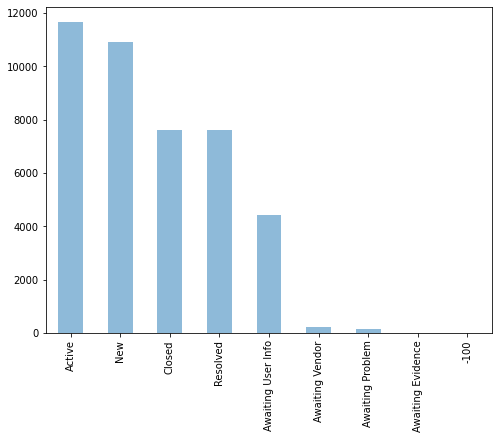

In [9]:
# explore data for incident status
plt.figure(figsize=(8,6))
df.ID_status.value_counts().plot(kind='bar',alpha=.5)
plt.show()

In [10]:
#Remove unwanted columns
df.drop(['S.No', 'created_at', 'updated_at'], axis=1, inplace=True)

In [11]:
#Eliminate the NAN
for col in df.columns:
   df.loc[df[col] == '?', col] = 0


In [12]:
df.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,notify,problem_ID,change_request
0,INC0000045,Resolved,True,0,0,2,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,Location 143,Category 55,Symptom 72,Group 56,0,True,False,Do Not Notify,0,0
1,INC0000047,New,True,0,0,0,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,...,Location 165,Category 40,Symptom 471,Group 70,Resolver 89,True,False,Do Not Notify,0,0
2,INC0000047,Active,True,1,0,3,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,...,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,Do Not Notify,0,0
3,INC0000047,Resolved,True,1,0,7,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,...,Location 165,Category 40,Symptom 471,Group 24,Resolver 89,True,False,Do Not Notify,0,0
4,INC0000057,New,True,0,0,4,Caller 4416,Opened by 8,29-02-2016 06:10,0,...,Location 204,Category 20,Symptom 471,Group 70,0,True,False,Do Not Notify,Problem ID 2,0


# Forecasting the Incident Volume

In [13]:
# Imporing the necessary columns
incfrq = df.loc[:,['ID','opened_time']]

In [14]:
incfrq.head()

,ID,opened_time
0,INC0000045,29-02-2016 01:16
1,INC0000047,29-02-2016 04:40
2,INC0000047,29-02-2016 04:40
3,INC0000047,29-02-2016 04:40
4,INC0000057,29-02-2016 06:10


In [15]:
# Adding a new column which will have the number of tickets per day
incfrq['No_Incidents'] = incfrq.groupby('opened_time')['ID'].transform('count')

In [16]:
incfrq.head()

,ID,opened_time,No_Incidents
0,INC0000045,29-02-2016 01:16,1
1,INC0000047,29-02-2016 04:40,3
2,INC0000047,29-02-2016 04:40,3
3,INC0000047,29-02-2016 04:40,3
4,INC0000057,29-02-2016 06:10,1


In [17]:
incfrq.drop(['ID'],axis=1,inplace=True)
incfrq.drop_duplicates(inplace=True)

In [18]:
incfrq.head()

,opened_time,No_Incidents
0,29-02-2016 01:16,1
1,29-02-2016 04:40,3
4,29-02-2016 06:10,1
5,29-02-2016 06:58,2
7,29-02-2016 07:08,2


In [19]:
# Setting Date as the Index
incfrq = incfrq.set_index('opened_time')
incfrq.index = pd.to_datetime(incfrq.index)
incfrq.index

DatetimeIndex(['2016-02-29 01:16:00', '2016-02-29 04:40:00',
               '2016-02-29 06:10:00', '2016-02-29 06:58:00',
               '2016-02-29 07:08:00', '2016-02-29 07:10:00',
               '2016-02-29 07:38:00', '2016-02-29 08:03:00',
               '2016-02-29 08:11:00', '2016-02-29 08:12:00',
               ...
               '2017-10-02 14:11:00', '2017-10-02 14:48:00',
               '2017-10-02 15:55:00', '2017-02-13 08:56:00',
               '2017-02-13 10:33:00', '2017-02-13 11:31:00',
               '2017-02-14 11:11:00', '2017-02-15 01:52:00',
               '2017-02-15 07:09:00', '2017-02-16 14:17:00'],
              dtype='datetime64[ns]', name='opened_time', length=16438, freq=None)

In [20]:
# Checking range of dates for our values
print(incfrq.index.min(),'to',incfrq.index.max())

2016-01-03 01:22:00 to 2017-12-01 12:41:00


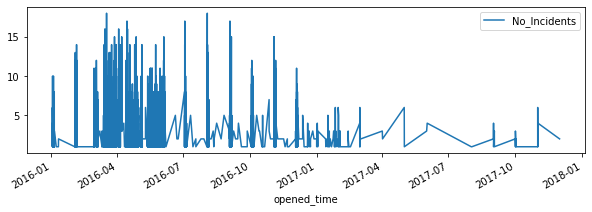

In [21]:
# Plotting number of tickets per day
incfrq.plot(figsize=(10,3))
plt.show()

In [22]:
# Making a list of values for p,d & q
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [28]:
# Checking the AIC values per pairs
import statsmodels.api as sm
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(incfrq,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:85078.81273258357
ARIMA(0, 0, 1) - AIC:80015.53571814793
ARIMA(0, 1, 0) - AIC:78525.14634030542
ARIMA(0, 1, 1) - AIC:67550.30004611769
ARIMA(1, 0, 0) - AIC:75511.51881668699
ARIMA(1, 0, 1) - AIC:67556.19976796478
ARIMA(1, 1, 0) - AIC:73927.29406811009
ARIMA(1, 1, 1) - AIC:67548.63704242159


In [29]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
mod = sm.tsa.statespace.SARIMAX(incfrq,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0157      0.007      2.141      0.032       0.001       0.030
ma.L1         -0.9904      0.001   -963.689      0.000      -0.992      -0.988
sigma2         3.5664      0.020    182.196      0.000       3.528       3.605


In [25]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2016-01-03 01:22:00'),end=pd.to_datetime('2017-12-01 12:41:00'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

opened_time
2016-01-03 01:22:00    3.0
2016-01-03 01:31:00    3.0
2016-01-03 01:36:00    3.0
2016-01-03 01:49:00    3.0
2016-01-03 02:56:00    3.0
                      ... 
2017-11-01 11:42:00    2.0
2017-11-01 11:43:00    2.0
2017-11-01 15:15:00    2.0
2017-11-01 17:01:00    2.0
2017-12-01 12:41:00    2.0
Name: predicted_mean, Length: 16208, dtype: float64

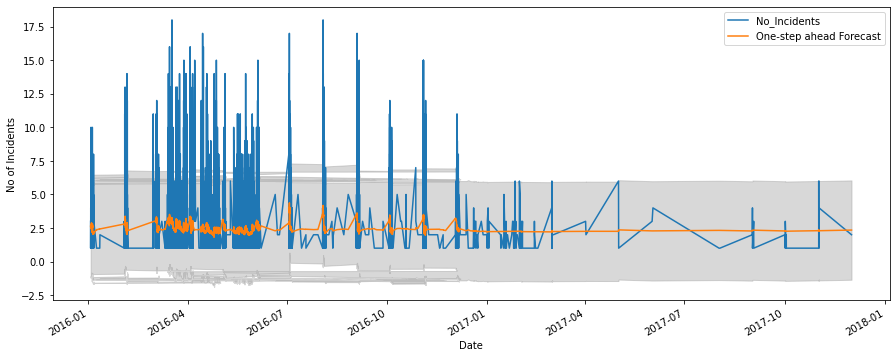

In [26]:
# Visualization
ax = incfrq['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()